In [3]:
import pygraph
import random

In [4]:
class Lewthwaite:
    
    DIR = {'E':(0, 1), 'W':(0, -1), 'N':(1, 0), 'S':(-1, 0)}
            
    def __init__(self, size):
        self.size = size
        self.graph = pygraph.DiGraph(size * size)
        self.player = 1
        self.pion = (size // 2) * size + size // 2
        self.moves = [self.pion]
    
    @property
    def node_ids(self):
        return range(self.size * self.size)

    @property
    def view(self):
        return self.graph.view

    def _num_to_coords(self, n):
        return divmod(n, self.size)
    
    def _coords_to_num(self, x, y):
        return x * self.size + y
    
    def inside(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size
        
    def _set_nodes_position(self):
        """positionne les sommets sur une grille : 0 est en bas à gauche 
        et on va vers la droite puis vers le haut"""
        y = -1
        for node_id in self.node_ids:
            if node_id % self.size == 0:
                y += 1
                x = 0
            else:
                x += 1
            self.graph.position([(node_id, x, y)])
        self.graph.scale(0.5)
    
    def _set_nodes_color(self):
        """colorise en gris un sommet sur 2 en ligne comme en colonne"""
        colors = ('lightgrey', 'white')
        begin_line_color_id = 1
        for node_id in self.node_ids:
            if node_id % self.size == 0:
                begin_line_color_id = 1 - begin_line_color_id
                color_id = begin_line_color_id
            else:
                color_id = 1 - color_id
            self.graph.color_on(node_id, colors[color_id])
        self.graph.color_on(self.pion, self.player)

    def free_neighbors(self, n):
        x, y = self._num_to_coords(n)
        candidats = {self._coords_to_num(x+dx, y+dy) for dx, dy in Lewthwaite.DIR.values() if self.inside(x+dx, y+dy)} 
        return [node_id for node_id in candidats if node_id not in self.moves]
        
    def init_view(self):
        self._set_nodes_position()
        self._set_nodes_color()
        
    def next_player(self):
        self.player = 1 - self.player
    
    def play(self, node_id):
        if node_id in self.free_neighbors(self.pion):
            self.graph.add_edge(self.pion, node_id)
            self.pion = node_id
            self.next_player()
            self.graph.color_on(self.pion, self.player)
            self.moves.append(node_id)
        return self.view
    
    def auto(self, moves):
        self.graph.write(filename=f'move{len(self.moves):02}', format='png')
        for node_id in moves:
            self.play(node_id)
            self.graph.write(filename=f'move{len(self.moves):02}', format='png')

    def random(self):
        self.graph.write(filename=f'move{len(self.moves):02}', format='png')        
        candidats = self.free_neighbors(self.pion)
        while candidats:
            node_id = random.choice(candidats)
            self.play(node_id)
            self.graph.write(filename=f'move{len(self.moves):02}', format='png')
            candidats = self.free_neighbors(self.pion)
        

    
    def reset(self):
        size = self.size
        del self.graph
        self.player = 1
        self.pion = (size // 2) * size + size // 2
        self.moves = [self.pion]
        self.graph = pygraph.DiGraph(size * size)
        self.init_view()
    
    def start(self):
        self.init_view()
                

In [5]:
jeu = Lewthwaite(5)

In [6]:
jeu.start()

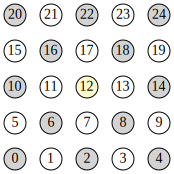

In [7]:
jeu.view

In [20]:
jeu.random()

In [23]:
jeu.reset()

In [22]:
jeu.auto([11, 10, 5, 6, 1, 2, 7, 8, 13, 18, 17, 16, 15, 20, 21, 22, 23, 24, 19, 14, 9, 4, 3])

In [24]:
jeu.auto([11, 10, 5, 6, 7])

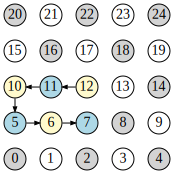

In [25]:
jeu.view

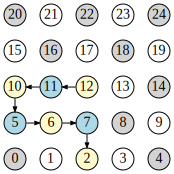

In [26]:
jeu.play(2)